<a href="https://colab.research.google.com/github/yash206/Data-Science-Projects/blob/main/Salary_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary.csv to salary.csv


In [ ]:
dataset = pd.read_csv('salary.csv')
print(dataset)

     Age  education.num  capital.gain  hours.per.week income
0     54             12             0              36  <=50K
1     17              3             0              28  <=50K
2     76              9             0              30   >50K
3     23              6             0              26   >50K
4     27              7             0              22  <=50K
..   ...            ...           ...             ...    ...
195   56             10             0              22  <=50K
196   61              5             0              22   >50K
197   30              4             1              32  <=50K
198   36              8             0              34   >50K
199   18              2             0              26   >50K

[200 rows x 5 columns]


In [ ]:
print(dataset.shape)
print(dataset.head(5))  #we can use tail instead of head to print from back

(200, 5)
   Age  education.num  capital.gain  hours.per.week income
0   54             12             0              36  <=50K
1   17              3             0              28  <=50K
2   76              9             0              30   >50K
3   23              6             0              26   >50K
4   27              7             0              22  <=50K


In [ ]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      Age  education.num  capital.gain  hours.per.week  income
0     54             12             0              36       0
1     17              3             0              28       0
2     76              9             0              30       1
3     23              6             0              26       1
4     27              7             0              22       0
..   ...            ...           ...             ...     ...
195   56             10             0              22       0
196   61              5             0              22       1
197   30              4             1              32       0
198   36              8             0              34       1
199   18              2             0              26       1

[200 rows x 5 columns]>


In [ ]:
X = dataset.iloc[:, :-1].values
X

In [ ]:
Y = dataset.iloc[:, -1].values
Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.25,random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Text(0, 0.5, 'Mean Error')

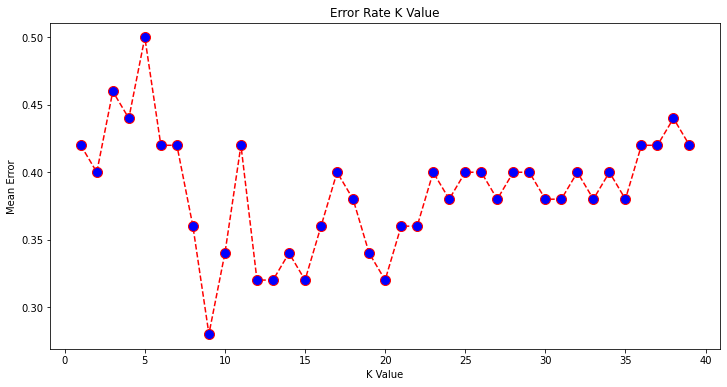

In [ ]:
#to know the best k no. for minimum error

error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,Y_train)
  pred_i=model.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hour's Per Week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)
if result==1:
  print("Employee might got Salary above 50K")
else:
  print("Employee might not got Salary above 50K")

In [ ]:
Y_pred = model.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,Y_pred)

print("Confusion Matrix: ")
print(cm)

print("Accuracy of the Model : {0}%".format(accuracy_score(Y_test,Y_pred)*100))

Confusion Matrix: 
[[26  4]
 [10 10]]
Accuracy of the Model : 72.0%
